In [19]:
import numpy as np
import pandas as pd

In [20]:
data = pd.read_csv("advertising.csv")

In [21]:
data

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


In [22]:
X = data[['TV', 'Radio', 'Newspaper']]  
y = data['Sales']  
x1 = data['TV']
x2 = data['Radio']
x3 = data['Newspaper']

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [25]:
from sklearn.linear_model import LinearRegression

In [26]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [27]:
# beta 1
model.coef_

array([0.05433229, 0.10928656, 0.00289599])

In [28]:
# beta 0
model.intercept_

np.float64(4.524745682649529)

Multiple Linear Regression Model

In [29]:
y = 4.7141264022141325 + 0.05450927 * x1 + 0.10094536 * x2 + 0.00433665 * x3

In [30]:
y = 4.7141264022141325 + 0.05450927 * 230.1 + 0.10094536 * 37.8 + 0.00433665 * 69.2
y

21.372540217214134

In [31]:
y_pred = model.predict(X_test)

In [32]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Absolute Error: 1.1899979838303392
Mean Squared Error: 2.1465132890835443
R-squared: 0.919553818252961


In [33]:
new_data = np.array([[230.1, 37.8, 69.2]])
new_prediction = model.predict(new_data)

d:\ML project\myenv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [34]:
new_prediction

array([21.35804038])

In [35]:
df = pd.DataFrame({'Actual':y_test, 'predicted':y_pred})
df

,Actual,predicted
64,16.0,16.408868
18,11.3,10.577911
27,20.9,19.461332
99,17.2,16.560647
137,20.8,22.726766
198,25.5,24.715134
78,5.3,8.113030
49,9.7,9.544801
173,16.7,14.487307
14,19.0,19.342710


Matplotlib is building the font cache; this may take a moment.


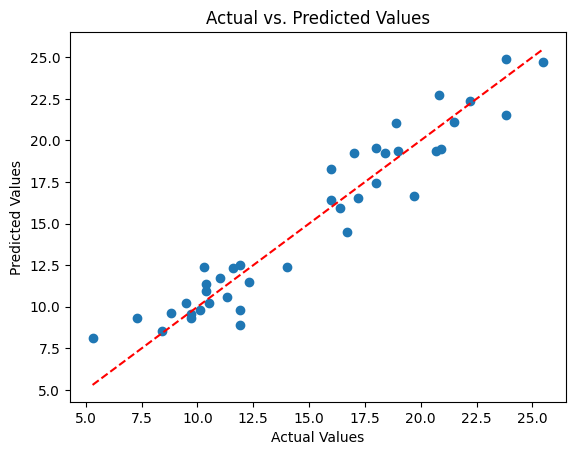

In [36]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values")

# You can also add a reference line for a perfect match (y = x)
min_val = min(np.min(y_test), np.min(y_pred))
max_val = max(np.max(y_test), np.max(y_pred))
plt.plot([min_val, max_val], [min_val, max_val], color='red', linestyle='--')

plt.show()


In [37]:
from scipy import stats
r = stats.linregress(y_test, y_pred)
print("R-squared value", r)

R-squared value LinregressResult(slope=np.float64(0.9329149148999951), intercept=np.float64(1.0725504858146735), rvalue=np.float64(0.9591295367604342), pvalue=np.float64(1.9604485151838678e-22), stderr=np.float64(0.044648752476959416), intercept_stderr=np.float64(0.7049541744302944))


In [38]:
import pickle

In [39]:
with open('linear.pkl', 'wb') as file:
    pickle.dump(model, file)